In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from math import sqrt

In [4]:
df = pd.read_csv("data/LoanData.csv")
df.head()

,LoanId,NewCreditCustomer,LoanDate,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,...,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,Rating,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,False,2022-09-09,By Bank Statement,27,Female,EE,3189.0,3189.0,35.48,...,UpTo5Years,Other,900.0,0,0.00,0,D,1.0,3402.0,0.0
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,False,2023-05-19,By Bank Statement,35,Female,FI,4146.0,4146.0,19.86,...,UpTo5Years,Owner,3100.0,0,0.00,0,B,1.0,518.0,0.0
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,False,2024-02-03,By Bank Statement,23,Male,EE,531.0,531.0,19.52,...,UpTo5Years,TenantFurnished,1700.0,0,0.00,0,B,3.0,1593.0,0.0
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,False,2016-03-23,By Bank Statement,53,Female,EE,2125.0,2125.0,20.97,...,MoreThan5Years,Owner,354.0,8,485.09,6,C,1.0,500.0,0.0
4,C7EA512A-465D-4043-A9F2-001B14C3C14E,False,2023-09-26,By Bank Statement,43,Male,FI,414.0,414.0,19.89,...,Other,TenantFurnished,1200.0,0,0.00,0,D,5.0,11198.0,0.0


In [5]:
df.set_index("LoanId", inplace=True)

In [6]:
df.index.name

'LoanId'

In [8]:

interest_mean = df["Interest"].mean()
interest_std = df["Interest"].std()


num_less_amount = (df["Amount"] < df["AppliedAmount"]).sum()

rating_proportion = df["Rating"].value_counts() / len(df)

In [9]:
print("Interest rate mean:", round(interest_mean, 2))
print("Interest rate standard deviation:", round(interest_std, 2))
print(
    "Number of borrowers that received less money than they asked for:", num_less_amount
)
print("Proportion of loan ratings:\n", rating_proportion.sort_index())

Interest rate mean: 27.29
Interest rate standard deviation: 18.03
Number of borrowers that received less money than they asked for: 10543
Proportion of loan ratings:
 Rating
A     0.043291
AA    0.024826
B     0.179124
C     0.317741
D     0.206457
E     0.115707
F     0.074443
HR    0.038411
Name: count, dtype: float64


In [10]:

df["DebtToIncome"] = df["Amount"] / df["IncomeTotal"]


df["IsRisky"] = (df["DebtToIncome"] >= 0.35) & (
    df["EmploymentDurationCurrentEmployer"].isin(["TrialPeriod", "UpTo1Year"])
)

risky_proportion = df["IsRisky"].mean()


mean_interest_risky = df.loc[df["IsRisky"], "Interest"].mean()

mean_interest_non_risky = df.loc[~df["IsRisky"], "Interest"].mean()

In [11]:
print("Risky loans proportion:", round(risky_proportion, 4))
print("Mean interest rate of risky loans:", round(mean_interest_risky, 4))
print("Mean interest rate of non-risky loans:", round(mean_interest_non_risky, 4))

Risky loans proportion: 0.1588
Mean interest rate of risky loans: 28.8592
Mean interest rate of non-risky loans: 26.9899


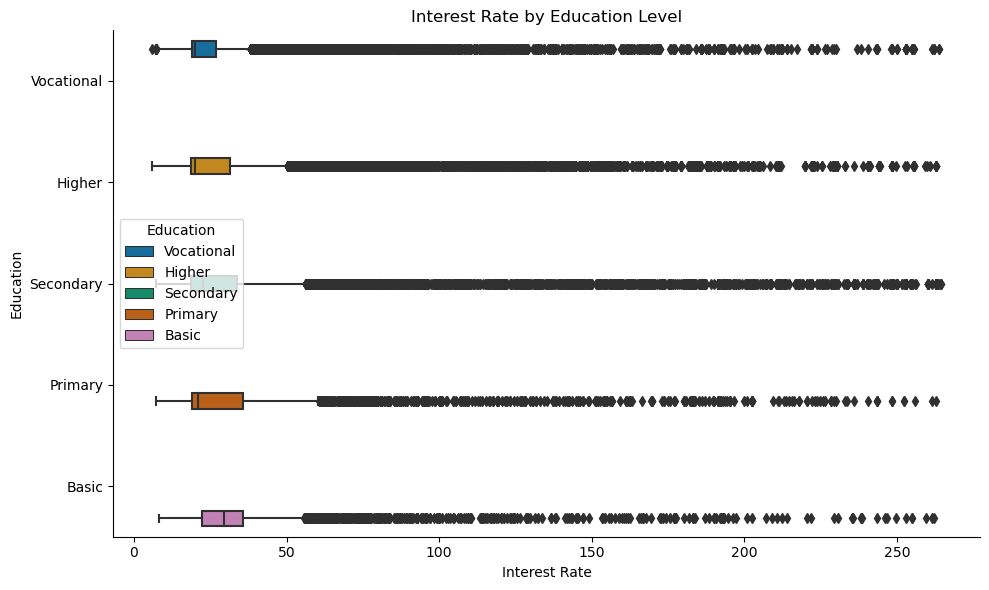

In [12]:

plt.figure(figsize=(10, 6))


boxplot_ax = sns.boxplot(
    data=df, x="Interest", y="Education", hue="Education", palette="colorblind"
)


plt.xlabel("Interest Rate")


plt.title("Interest Rate by Education Level")


sns.despine(top=True, right=True)


plt.tight_layout()
plt.show()

Correlation between Interest Rate and LoanDuration:
-0.0106
Correlation between Interest Rate and IncomeTotal:
-0.0122
Correlation between Interest Rate and AmountOfPreviousLoansBeforeLoan:
-0.175
Correlation between Interest Rate and DebtToIncome:
-0.0053


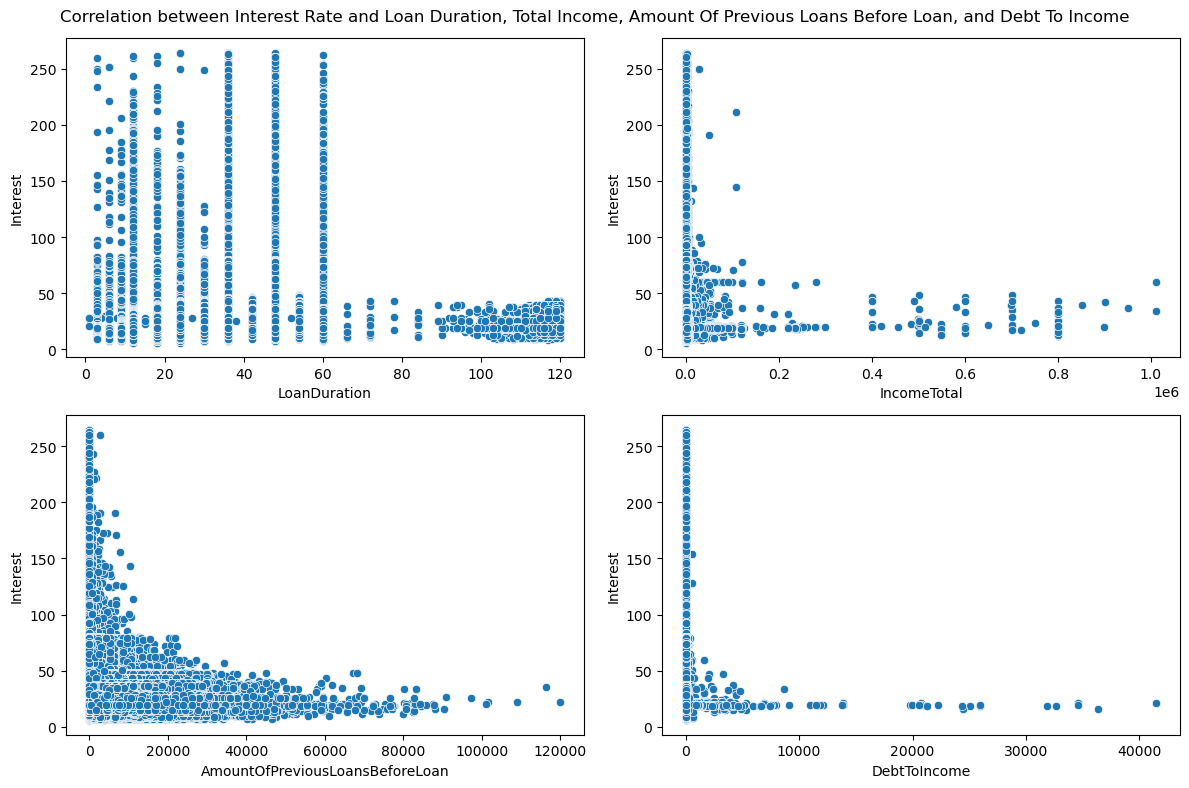

In [15]:
scatterplot_fig = plt.figure(figsize=(12, 8))


correlation = []


corr_columns = [
    "LoanDuration",
    "IncomeTotal",
    "AmountOfPreviousLoansBeforeLoan",
    "DebtToIncome",
]

for i in range(1, 5):

    column_name = corr_columns[i - 1]
    
    plt.subplot(2, 2, i)

    sns.scatterplot(data=df, x=column_name, y="Interest")

    corr = df["Interest"].corr(df[column_name])
    
    correlation.append(corr)
    
    print(
        "Correlation between Interest Rate and "
        + column_name
        + ":\n"
        + str(round(corr, 4))
    )


plt.suptitle(
    "Correlation between Interest Rate and Loan Duration, Total Income, Amount Of Previous Loans Before Loan, and Debt To Income"
)


plt.tight_layout()
plt.show()

In [16]:

num_differences = (df["Amount"] < df["AppliedAmount"]).sum()

n = len(df)

phat = num_differences / n

se = sqrt((phat * (1 - phat)) / n)

confidence_interval = stats.norm.interval(0.95, loc=phat, scale=se)


In [17]:

X_simple = sm.add_constant(df["AmountOfPreviousLoansBeforeLoan"])


Y_simple = df["Interest"]


model_simple = sm.OLS(Y_simple, X_simple)

results_simple = model_simple.fit()


print(results_simple.summary())


                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:11:43   Log-Likelihood:            -1.6468e+06
No. Observations:              383382   AIC:                         3.294e+06
Df Residuals:                  383380   BIC:                         3.294e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

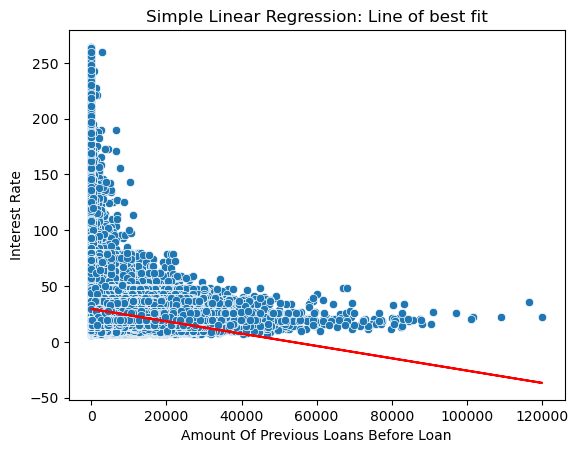

In [18]:
plt.figure()
sns.scatterplot(data=df, x="AmountOfPreviousLoansBeforeLoan", y="Interest")
plt.plot(
    df["AmountOfPreviousLoansBeforeLoan"], results_simple.predict(X_simple), color="red"
)
plt.title("Simple Linear Regression: Line of best fit")
plt.xlabel("Amount Of Previous Loans Before Loan")
plt.ylabel("Interest Rate")
plt.show()

In [19]:

predictors = [
    "Rating",
    "AmountOfPreviousLoansBeforeLoan",
    "LoanDuration",
    "DebtToIncome",
    "Education",
]

categorical = ["Rating", "Education"]

X = sm.add_constant(
    pd.get_dummies(df[predictors], columns=categorical, drop_first=True, dtype=int)
)

Y = df["Interest"]

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 4.173e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:            -1.4753e+06
No. Observations:              383382   AIC:                         2.951e+06
Df Residuals:                  383367   BIC:                         2.951e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     